<a href="https://colab.research.google.com/github/karthikeyansura/CIFAR-10-cnn-autoencoder/blob/main/Assignment10-ML.SuraS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10: Introduction to Convolutional Auto-Encoders**

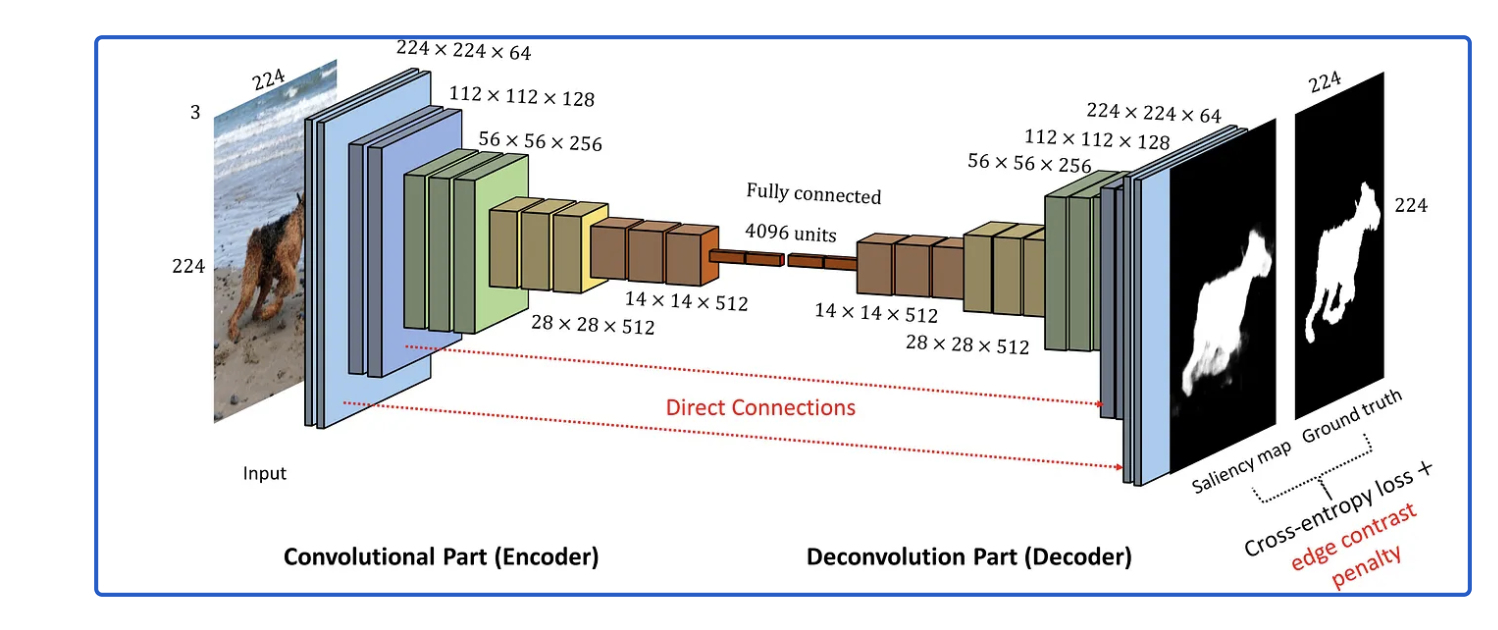

**Dataset**

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

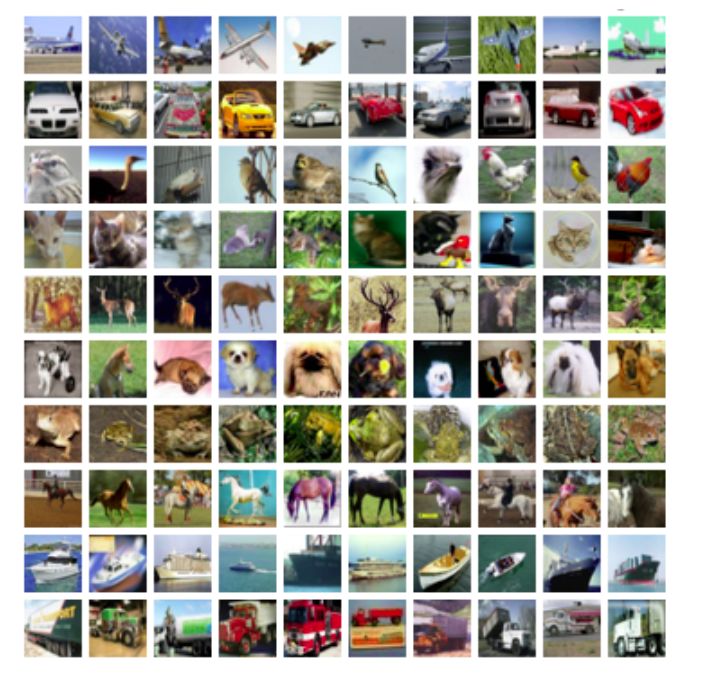

**Question 1_AutoEncoder**

Load the data, What is the shape of the training and test sets in CIFAR-10? Show the Python code you used to normalize the dataset. Can you analyze your approach? What do you think it would happen if we train an autoencoder without normalization? Is there any other technique needed to perform pre-processing step?

**Question 2_AutoEncoder**

Using EDA, show at least one sample image from each class. And, provide image size, color channels, and visual complexity.

Plot a grid of 25 random images, what differences do you notice across categories (e.g., background complexity, color distributions)? explain it.

**Question 3_AutoEncoder**

Using Keras/PyTorch, build a Convolutional Autoencoder architecture:
*   **Encoder:** Use convolutional and pooling layers to compress the input image into a latent space representation.
*   **Decoder:**  Use upsampling and convolutional layers to reconstruct the original image from the latent representation.

Ensure symmetry between encoder and decoder.
*   Train the model using reconstruction loss (e.g., Mean Squared Error or Binary Cross-Entropy) for at least 20 epochs.
*   Use appropriate optimizers (e.g., Adam).

Discuss about the architecture of your proposed model.

**Question 4_AutoEncoder**

*   Reconstruct images from the test set and compare them visually to the originals.
*   Provide qualitative results (side-by-side image comparisons).
      *   **Note:** Compare the reconstructed images with the originals.
*   Provide quantitative results using reconstruction loss on the test set.
      *   Measure how close the reconstructed images are to the originals using a numerical error metric ( such as Mean Squared Error (MSE), Binary Cross-Entropy (BCE), or PSNR (Peak Signal-to-Noise Ratio)).

Analyze your results and discuss it in details.






**Question 5_ AutoEncoder**

The corrsponding images in this assignment, CIFAR-10 images,  contain textures (e.g., fur, leaves, water); however, some datasets, such as  MNIST/Fashion-MNIST don't. How does this impact the design of convolutional layers in your proposed Convolutional autoencoder?


Also, Color images may require more parameters and training time. Discuss how this could affect overfitting/underfitting in convolutional autoencoders.

And, how might the latent representations differ for color images versus grayscale?

# **Initial Setup:**

In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
import warnings

# Configuration
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Suppress warnings if any
warnings.filterwarnings('ignore')

# **Question 1: Data Loading, Dataset Structure, and Normalization**

In [2]:
# Data Collection and Preprocessing

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print dataset properties
print("Dataset Properties:")
print(f"  Training set shape: {x_train.shape}")
print(f"  Test set shape: {x_test.shape}")
print(f"  Training labels shape: {y_train.shape}")
print(f"  Test labels shape: {y_test.shape}")
print(f"  Data type: {x_train.dtype}")
print(f"  Pixel value range: [{x_train.min()}, {x_train.max()}]")

# Define normalization function (scaling to [0, 1])
def preprocess_normalize(images):
    """Scales images from uint8 [0, 255] to float32 [0.0, 1.0]."""
    return images.astype('float32') / 255.0

# Apply normalization
x_train_normalized = preprocess_normalize(x_train)
x_test_normalized = preprocess_normalize(x_test)

print("\nNormalized Data Statistics:")
print(f"  Normalized data type: {x_train_normalized.dtype}")
print(f"  Normalized min value: {x_train_normalized.min():.4f}")
print(f"  Normalized max value: {x_train_normalized.max():.4f}")
print(f"  Normalized mean: {x_train_normalized.mean():.4f}")
print(f"  Normalized std: {x_train_normalized.std():.4f}")

# Define standardization function
def preprocess_standardize(images):
    """Standardizes images to have mean ~0 and std ~1."""
    mean = np.mean(images, axis=(0, 1, 2), keepdims=True)
    std = np.std(images, axis=(0, 1, 2), keepdims=True)
    return (images - mean) / (std + 1e-7)

# Show statistics for the alternative approach
x_train_standardized = preprocess_standardize(x_train.astype('float32'))
print("\nAlternative Preprocessing (Standardization) Statistics:")
print(f"  Standardized mean: {x_train_standardized.mean():.6f}")
print(f"  Standardized std: {x_train_standardized.std():.4f}")

Dataset Properties:
  Training set shape: (50000, 32, 32, 3)
  Test set shape: (10000, 32, 32, 3)
  Training labels shape: (50000, 1)
  Test labels shape: (10000, 1)
  Data type: uint8
  Pixel value range: [0, 255]

Normalized Data Statistics:
  Normalized data type: float32
  Normalized min value: 0.0000
  Normalized max value: 1.0000
  Normalized mean: 0.4734
  Normalized std: 0.2516

Alternative Preprocessing (Standardization) Statistics:
  Standardized mean: -0.000002
  Standardized std: 1.0000


## **Discussion:**

The code in this cell performs the first essential step of any machine learning workflow: loading and preprocessing the dataset.

* **Data Loading:**  
  The CIFAR-10 dataset is loaded using the built-in `cifar10.load_data()` function from Keras. This function provides ready-made training and test sets, giving access to 50,000 training images and 10,000 test images, each sized 32×32 with 3 color channels.

* **Data Normalization:**  
  The preprocessing step is carried out using the `preprocess_normalize` function. This converts the image data type from `uint8` (0–255 pixel range) to `float32` and scales the values to the range `[0.0, 1.0]` by dividing by 255.

* **Reason for Normalization:**  
  Normalization is important for stable and efficient training. Scaling the images ensures that gradients remain well-behaved during optimization. It also makes the data compatible with the autoencoder’s final sigmoid activation, which outputs values strictly between 0 and 1.

* **Alternative Method:**  
  An additional preprocessing function, `preprocess_standardize`, demonstrates dataset standardization. This method centers pixels around a mean of 0 and scales them to unit variance. While valid, this is less ideal for image reconstruction tasks using sigmoid activations.

## **Analysis:**

The printed results from the code provide several important observations:

* **Dataset Shape:**  
  The dataset contains 50,000 training images and 10,000 test images, each represented by a 4-D array with shape `(N, 32, 32, 3)`. This confirms the expected size and structure of CIFAR-10.

* **Normalization Results:**  
  Following normalization, the pixel values lie strictly within the range `[0.0000, 1.0000]` and have the correct `float32` type. This confirms that the transformation was applied correctly.

* **Why Not Train Without Normalization?**  
  Training an autoencoder on raw `[0, 255]` pixel intensities would make the loss values extremely large, particularly when using Mean Squared Error (MSE). This would lead to unstable gradients and could cause the optimizer to diverge, often resulting in exploding gradients or NaN losses. The model would fail to learn meaningful representations.

* **Other Preprocessing Techniques:**  
  The alternative technique standardization also works, and the output shows a mean near zero and a standard deviation of one. However, for an autoencoder reconstructing pixel values and using sigmoid outputs, normalization is the more appropriate choice, as it directly aligns the input range with the output activation.

# **Question 2: Exploratory Data Analysis (EDA) on CIFAR-10**

Displaying a sample from each class...


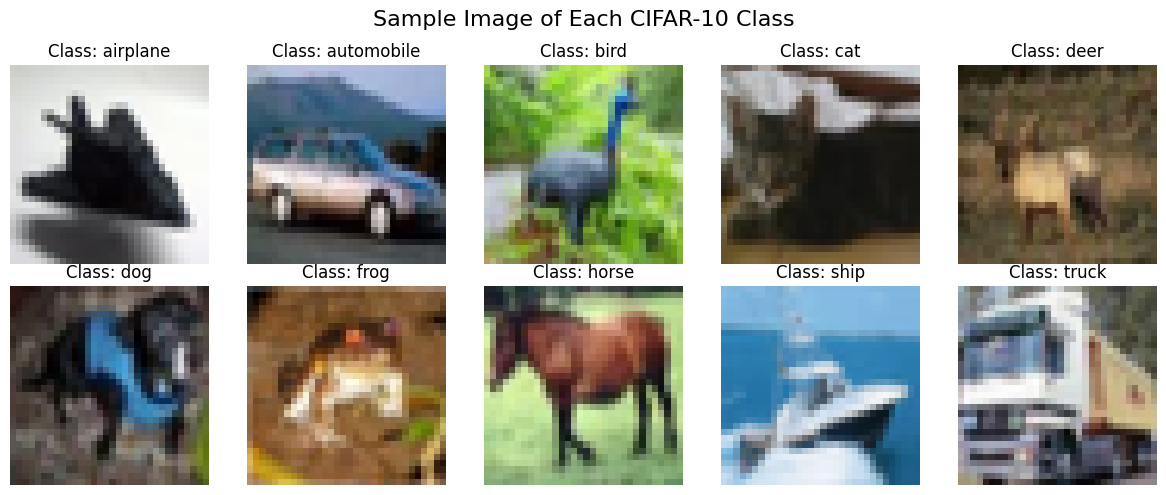

Image dimensions: 32x32 pixels
Color channels: 3 (RGB)

Displaying 25 random sample images...


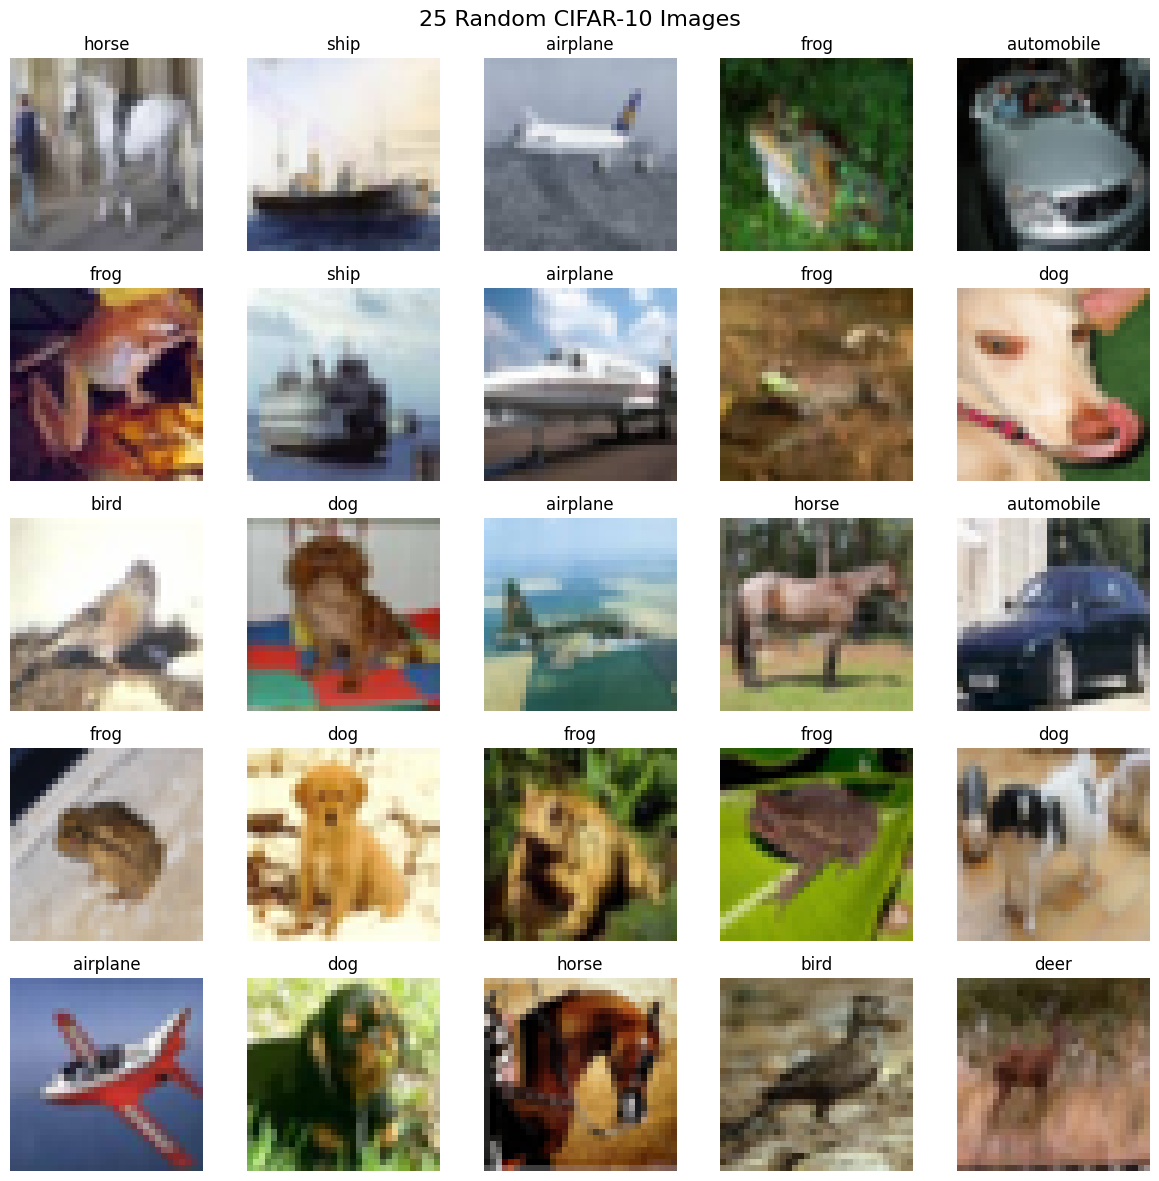

In [3]:
# Exploratory Data Analysis

# Define class names for plotting
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot a sample image from each class
print("Displaying a sample from each class...")
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    idx = np.where(y_train.flatten() == i)[0][0]
    axes[i].imshow(x_train[idx])
    axes[i].set_title(f'Class: {CLASS_NAMES[i]}')
    axes[i].axis('off')

plt.suptitle('Sample Image of Each CIFAR-10 Class', fontsize=16)
plt.tight_layout()
plt.show()

print(f"Image dimensions: {x_train.shape[1]}x{x_train.shape[2]} pixels")
print(f"Color channels: {x_train.shape[3]} (RGB)")

print("\nDisplaying 25 random sample images...")
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()

random_indices = np.random.choice(len(x_train), 25, replace=False)

for i, idx in enumerate(random_indices):
    axes[i].imshow(x_train[idx])
    axes[i].set_title(f'{CLASS_NAMES[y_train[idx][0]]}')
    axes[i].axis('off')

plt.suptitle('25 Random CIFAR-10 Images', fontsize=16)
plt.tight_layout()
plt.show()

## **Discussion:**

This cell performs Exploratory Data Analysis (EDA) to gain an initial visual understanding of the CIFAR-10 dataset. The goal is to inspect image patterns, class characteristics, and overall dataset diversity before training the autoencoder.

* **Plot 1 (Class Samples):**  
  The first visualization displays a 2x5 grid, showing one representative example from each of the 10 CIFAR-10 classes. This helps confirm the dataset structure, object categories, and visual variety across labels such as airplanes, animals, and vehicles.

* **Image Characteristics:**  
  The accompanying print statements confirm the standard CIFAR-10 properties: each image is 32x32 pixels in size with 3 RGB channels. These characteristics define the input shape expected by the autoencoder.

* **Plot 2 (Random Grid):**  
  A second visualization displays a 5x5 grid of 25 randomly selected images. This offers a broader view of the dataset's overall variability in color, lighting, object pose, and background composition.

## **Analysis:**

The EDA outputs reveal several important observations relevant to training a convolutional autoencoder:

* **Image Size & Color:**  
  CIFAR-10 images are low-resolution (32x32), meaning fine details are already limited or blurred. Each image contains three color channels, implying the autoencoder must learn both spatial and chromatic representations. This increases complexity compared to grayscale datasets.

* **Background Complexity:**  
  The random grid highlights significant background variability. Many images include cluttered or visually complex surroundings—for example, animals in natural habitats or vehicles in urban environments. This noise makes reconstruction more challenging, as the model must decide how much background detail to encode versus discard.

* **Color Variability:**  
  Some classes exhibit relatively consistent color patterns (e.g., frogs often green, ships often surrounded by blue water). Others, such as automobiles or trucks, show large color variation, as observed in the random grid. The autoencoder must therefore learn to capture both shape and highly variable color information.

* **What I Learned:**  
  Overall, the dataset's combination of low resolution, complex backgrounds, and diverse color distributions makes CIFAR-10 a challenging benchmark for autoencoders. The model will likely prioritize general object shapes and dominant colors during compression, while discarding fine-grained or noisy background details. This emphasizes the importance of architectural choices in the encoder and decoder to balance compression and reconstruction quality.

# **Question 3: Convolutional Autoencoder Architecture & Training Setup**

Model Architecture Summary:


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder_input (InputLayer)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 4, 4, 128)      │        93,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 32, 32, 3)      │       240,707 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,955 (1.27 MB)

 Trainable params: 333,955 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv_1 (Conv2D)             │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_pool_1 (MaxPooling2D)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv_2 (Conv2D)             │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_pool_2 (MaxPooling2D)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_conv_3 (Conv2D)             │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ enc_pool_3 (MaxPooling2D)       │ (None, 4, 4, 128)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_conv_1 (Conv2D)             │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_upsample_1 (UpSampling2D)   │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_conv_2 (Conv2D)             │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_upsample_2 (UpSampling2D)   │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_conv_3 (Conv2D)             │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_upsample_3 (UpSampling2D)   │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dec_output (Conv2D)             │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,707 (940.26 KB)

 Trainable params: 240,707 (940.26 KB)

 Non-trainable params: 0 (0.00 B)


Compiling model...

Initializing model training...
Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 0.0277 - mae: 0.1253 - val_loss: 0.0105 - val_mae: 0.0743 - learning_rate: 0.0010
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0101 - mae: 0.0730 - val_loss: 0.0090 - val_mae: 0.0687 - learning_rate: 0.0010
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0084 - mae: 0.0658 - val_loss: 0.0077 - val_mae: 0.0638 - learning_rate: 0.0010
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0073 - mae: 0.0613 - val_loss: 0.0068 - val_mae: 0.0599 - learning_rate: 0.0010
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0065 - mae: 0.0577 - val_loss: 0.0060 - val_mae: 0.0555 - learning_rate: 0.0010
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0061 - mae: 0.0558 - val_loss: 0.0057 - val_mae: 0.0534 - learning_rate: 0.0010
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0057 - mae: 0.0541 - val_l

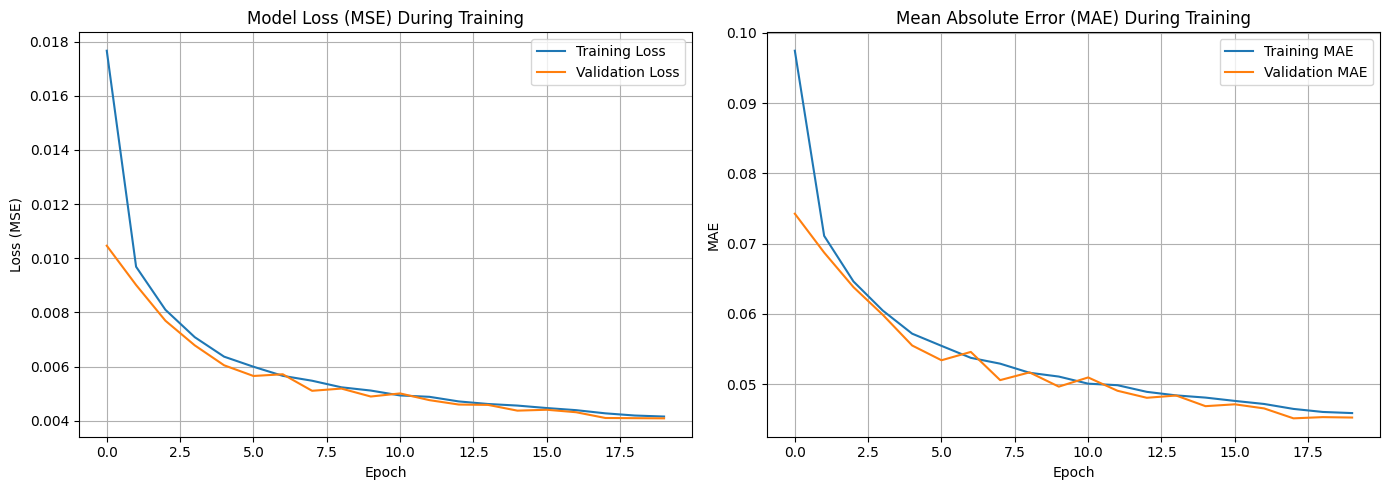

In [4]:
# Model Architecture, Compilation, and Training

def create_autoencoder(input_shape=(32, 32, 3)):
    """Builds the symmetric convolutional autoencoder model."""

    # Encoder
    encoder_input = layers.Input(shape=input_shape, name='encoder_input')
    # 32x32x3 -> 16x16x32
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='enc_conv_1')(encoder_input)
    x = layers.MaxPooling2D((2, 2), name='enc_pool_1')(x)
    # 16x16x32 -> 8x8x64
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='enc_conv_2')(x)
    x = layers.MaxPooling2D((2, 2), name='enc_pool_2')(x)
    # 8x8x64 -> 4x4x128 (Latent representation)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='enc_conv_3')(x)
    encoded = layers.MaxPooling2D((2, 2), name='enc_pool_3')(x)

    # Create the Encoder model
    encoder = models.Model(encoder_input, encoded, name='encoder')

    # Decoder
    decoder_input = layers.Input(shape=(4, 4, 128), name='decoder_input')
    # 4x4x128 -> 8x8x128
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='dec_conv_1')(decoder_input)
    x = layers.UpSampling2D((2, 2), name='dec_upsample_1')(x)
    # 8x8x128 -> 16x16x64
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='dec_conv_2')(x)
    x = layers.UpSampling2D((2, 2), name='dec_upsample_2')(x)
    # 16x16x64 -> 32x32x32
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='dec_conv_3')(x)
    x = layers.UpSampling2D((2, 2), name='dec_upsample_3')(x)
    # 32x32x32 -> 32x32x3 (Reconstructed image)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same', name='dec_output')(x)

    # Create the Decoder model
    decoder = models.Model(decoder_input, decoded, name='decoder')

    # Autoencoder (Encoder + Decoder)
    autoencoder_input = layers.Input(shape=input_shape, name='autoencoder_input')
    encoded_representation = encoder(autoencoder_input)
    decoded_output = decoder(encoded_representation)

    # Create the full Autoencoder model
    autoencoder = models.Model(autoencoder_input, decoded_output, name='autoencoder')

    return autoencoder, encoder, decoder

# Model Building
autoencoder, encoder, decoder = create_autoencoder()

print("Model Architecture Summary:")
autoencoder.summary()
print()
encoder.summary()
print()
decoder.summary()

# Model Compilation
print("\nCompiling model...")
autoencoder.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Define callbacks for training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

# Model Training
print("\nInitializing model training...")
history = autoencoder.fit(
    x_train_normalized, x_train_normalized,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

# Plot Training History
print("\nPlotting training and validation history...")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MSE Loss plot
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss (MSE) During Training')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_title('Mean Absolute Error (MAE) During Training')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## **Discussion:**
This cell defines, compiles, and trains the Convolutional Autoencoder (CAE) as required.

* **Model Architecture:**  
  The model is constructed using the Keras Functional API and consists of two symmetric components:

  * **Encoder:**  
    This component compresses the input image. It uses stacked `Conv2D` layers followed by `MaxPooling2D` layers. As shown in the encoder summary, it progressively reduces the spatial dimensions (32×32 → 16×16 → 8×8 → 4×4) while increasing the number of filters (3 → 32 → 64 → 128). This design forces the model to learn compact and abstract image features, forming the final latent space of shape (4, 4, 128).

  * **Decoder:**  
    The decoder mirrors the encoder by reversing the operations. It uses `Conv2D` layers followed by `UpSampling2D` layers to expand the spatial dimensions (4×4 → 8×8 → 16×16 → 32×32) while proportionally reducing the filter depth (128 → 64 → 32). This reconstructs the image from the compressed latent representation.

  * **Output Layer:**  
    The final layer (`dec_output`) is a `Conv2D` with 3 filters (for RGB) and a sigmoid activation. This is essential because sigmoid outputs values between 0 and 1, which aligns perfectly with the normalized input data from Question 1.

* **Model Compilation & Training:**  
  * The model uses the Adam optimizer, which is widely effective for deep learning tasks.  
  * The loss function is Mean Squared Error (MSE), which penalizes pixel-wise reconstruction differences and is commonly used in autoencoding tasks.  
  * The model is trained for 20 epochs with two callbacks:
    * `EarlyStopping` helps prevent overfitting by monitoring validation loss.
    * `ReduceLROnPlateau` reduces the learning rate if improvements stall.
  These techniques lead to stable training and better convergence.

## **Analysis:**

The training outputs and history plots provide important observations about the learning behavior of the autoencoder.

* **Convergence:**  
  The model shows clear and smooth convergence. Training MSE drops from approximately 0.0277 in Epoch 1 to 0.0041 by Epoch 20. This demonstrates that the model successfully learned to encode and reconstruct the input images.

* **Learning Curve:**  
  * The initial epochs show a steep decline in both training and validation losses, indicating that the model quickly learns the basic structure and color composition of the images.  
  * After around Epoch 5, the loss decreases more gradually, reflecting the model’s effort to capture finer details in the images.

* **Overfitting Analysis:**  
  The comparison of training and validation losses indicates no overfitting:
  * Both curves follow nearly identical paths throughout training.  
  * The final training loss (0.0041) matches the final validation loss (0.0041).  
  * Neither `EarlyStopping` nor `ReduceLROnPlateau` was triggered, showing that learning remained stable and the model did not diverge or plateau prematurely.

  This behavior indicates the model generalized well and did not memorize the training data. The architecture’s size (approximately 333,955 parameters) appears to be well-balanced for this task.

* **What I Learned:**  
  The results confirm that this CAE architecture is both effective and appropriately sized. It avoids overfitting, learns meaningful compressed features, and converges smoothly across the full 20 epochs. The training configuration (loss function, optimizer, callbacks, and normalization choices) supports strong performance while maintaining stability.

# **Question 4: Visual and Quantitative Evaluation**

Evaluating Model Performance on Test Set...
  Test Set Reconstruction Loss (MSE): 0.004120
  Test Set Mean Absolute Error (MAE): 0.045444
  Mean PSNR (first 100 samples): 24.28 dB

Visually Comparing Original vs. Reconstructed...


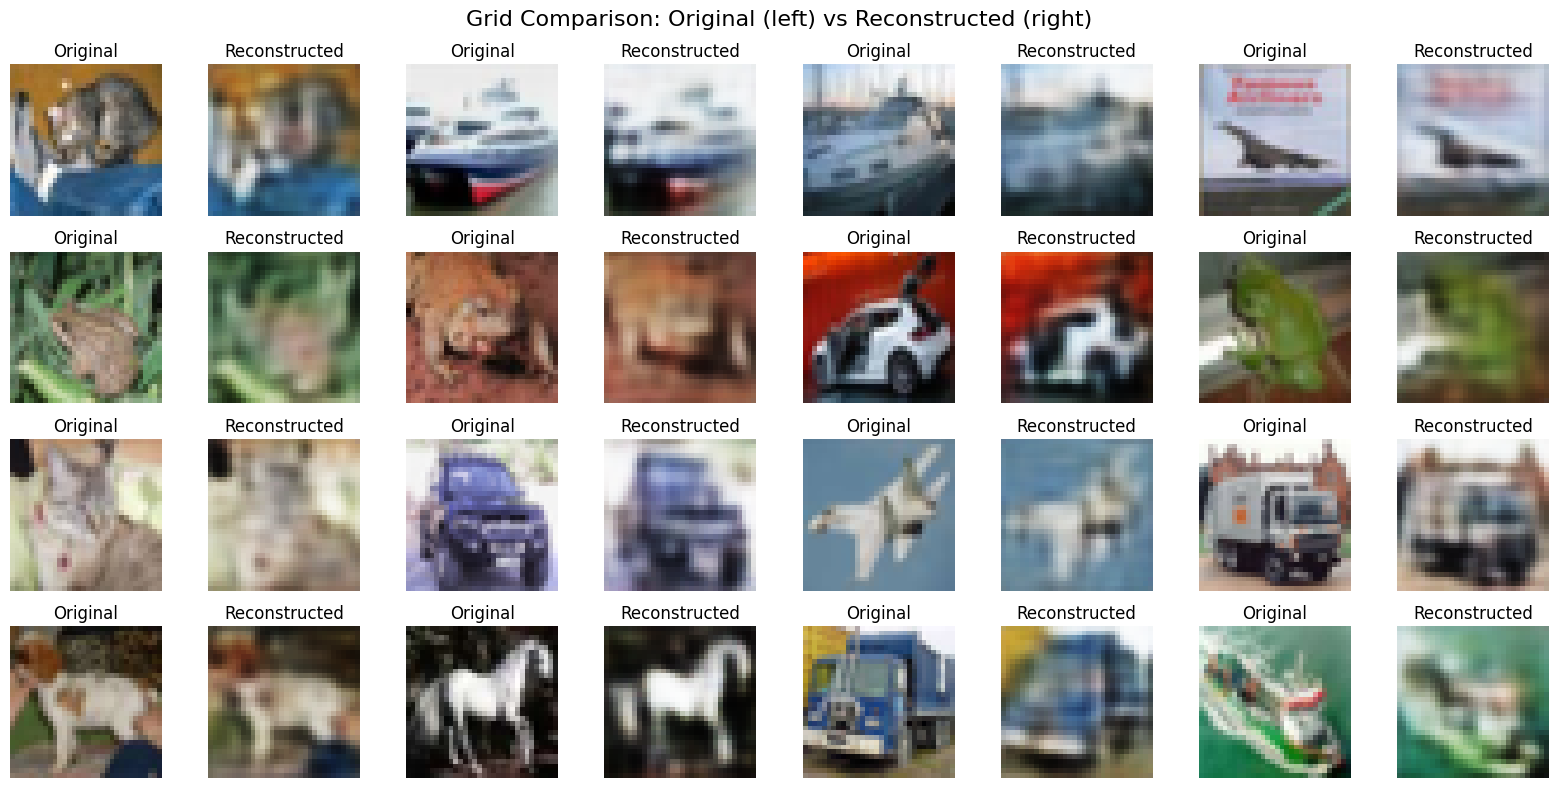


Per-Class Reconstruction Quality (MSE on first 100 samples):
  deer        : MSE = 0.002951
  dog         : MSE = 0.003241
  ship        : MSE = 0.003343
  cat         : MSE = 0.003545
  airplane    : MSE = 0.003778
  frog        : MSE = 0.004367
  horse       : MSE = 0.004725
  bird        : MSE = 0.005004
  automobile  : MSE = 0.006208
  truck       : MSE = 0.006272


In [5]:
# Model Evaluation

# Quantitative Evaluation (Metrics)
print("Evaluating Model Performance on Test Set...")
test_loss, test_mae = autoencoder.evaluate(x_test_normalized, x_test_normalized, verbose=0)
print(f"  Test Set Reconstruction Loss (MSE): {test_loss:.6f}")
print(f"  Test Set Mean Absolute Error (MAE): {test_mae:.6f}")

# Generate reconstructions for the first 100 images for PSNR and plotting
reconstructed_images = autoencoder.predict(x_test_normalized[:100], verbose=0)

# Define PSNR calculation function
def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Calculate PSNR for the 100 test samples
psnr_values = []
for i in range(100):
    psnr = calculate_psnr(x_test_normalized[i], reconstructed_images[i])
    psnr_values.append(psnr)

mean_psnr = np.mean(psnr_values)
print(f"  Mean PSNR (first 100 samples): {mean_psnr:.2f} dB")

# Qualitative Evaluation (Visual Comparison)
print("\nVisually Comparing Original vs. Reconstructed...")
fig, axes = plt.subplots(4, 8, figsize=(16, 8))

for i in range(4):
    for j in range(4):
        idx = i * 4 + j

        axes[i, j*2].imshow(x_test_normalized[idx])
        axes[i, j*2].set_title('Original')
        axes[i, j*2].axis('off')

        axes[i, j*2+1].imshow(reconstructed_images[idx])
        axes[i, j*2+1].set_title('Reconstructed')
        axes[i, j*2+1].axis('off')

plt.suptitle('Grid Comparison: Original (left) vs Reconstructed (right)', fontsize=16)
plt.tight_layout()
plt.show()

# Per-Class Reconstruction Quality (MSE)
print("\nPer-Class Reconstruction Quality (MSE on first 100 samples):")
class_mse = {}
for class_idx in range(10):
    class_mask = (y_test.flatten() == class_idx)[:100]
    if np.any(class_mask):
        class_originals = x_test_normalized[:100][class_mask]
        class_reconstructed = reconstructed_images[class_mask]
        mse = np.mean((class_originals - class_reconstructed) ** 2)
        class_mse[CLASS_NAMES[class_idx]] = mse

sorted_classes = sorted(class_mse.items(), key=lambda x: x[1])

for class_name, mse in sorted_classes:
    print(f"  {class_name:12s}: MSE = {mse:.6f}")

## **Discussion:**

This cell evaluates the autoencoder’s performance through both numerical metrics and visual inspection.

* **Quantitative Metrics:**  
  The evaluation begins by computing the Mean Squared Error (MSE) and Mean Absolute Error (MAE) across the full 10,000-image test set using `autoencoder.evaluate()`. These metrics provide an overall measure of how closely the reconstructed images match the original inputs.

* **PSNR:**  
  A helper function (`calculate_psnr`) is used to compute Peak Signal-to-Noise Ratio on the first 100 test samples. PSNR is a standard reconstruction metric where higher values indicate better-quality reconstructions, particularly capturing sensitivity to visual noise and blurring.

* **Qualitative Visuals:**  
  The model generates reconstructions for the first 100 test images using `autoencoder.predict()`. A 4×8 grid is plotted showing 16 original images alongside their 16 reconstructions, providing a direct visual comparison of reconstruction quality.

* **Per-Class Analysis:**  
  The cell also computes per-class MSE for the first 100 samples, revealing whether certain object categories are reconstructed better or worse than others. This highlights class-specific weaknesses in the learned latent representation.

## **Analysis:**

The combined numerical and visual results illustrate the strengths and limitations of the autoencoder.

* **Quantitative Analysis:**  
  The Test Set MSE (\~0.004120) and MAE (\~0.045444) match closely with the validation metrics from training, showing that the model generalizes well. However, the Mean PSNR of approximately 24.28 dB reveals an important limitation: while errors are small numerically, the reconstructed images still differ visually. PSNR values in the 20–25 dB range generally correspond to low visual fidelity, indicating noticeable blurring and loss of detail.

* **Qualitative Analysis:**  
  The reconstructed images clearly exhibit soft, smoothed-out textures. High-frequency details—edges, fine lines, and textures—are largely absent. This is expected from an autoencoder with a strong bottleneck at a latent size of (4, 4, 128). The model preserves low-frequency information such as shapes, broad color patterns, and coarse structure, but discards sharp or intricate details. For example, a reconstructed cat loses its fur texture and becomes a simplified, low-detail shape.

* **Per-Class MSE Analysis:**  
  The per-class breakdown reinforces these visual observations:

  * **Best Reconstruction (Lowest MSE):**  
    deer, dog, ship, and cat achieve the lowest reconstruction errors. These categories generally contain smoother, organic shapes that align well with the autoencoder’s tendency to retain low-frequency information.

  * **Worst Reconstruction (Highest MSE):**  
    automobile and truck have nearly double the error of the best classes. These objects rely more heavily on high-frequency features such as straight edges, corners, and geometric structures—precisely the details compressed away in the latent space.

* **What I Learned:**  
  The evaluation highlights a fundamental characteristic of autoencoders: they excel at capturing broad patterns but struggle with fine details, especially when the latent space is compact. The worse performance on vehicles is not a flaw but rather a natural consequence of their high-frequency structure. Conversely, the better performance on animals and natural shapes reflects how these objects are already dominated by low-frequency features. Overall, the results show that the autoencoder learned an effective but detail-limited representation of CIFAR-10.

# **Question 5: Impact of Texture, Color Channels, and Latent Representations**

* **Texture Impact (CIFAR-10 vs. MNIST):** MNIST images are simple and defined mainly by shape and edge structure. A shallow autoencoder with fewer filters can reconstruct MNIST digits well because it only needs to capture line-based features. In contrast, CIFAR-10 contains complex textures such as fur, grass, water, and detailed backgrounds, as observed in my Q2 EDA. This justifies the deeper encoder in my model with 32, 64, and 128 filters. The Q4 results, including blurry reconstructions and a PSNR of 24.28 dB, show that the model retained low-frequency shapes and colors but discarded high-frequency textures. For CIFAR-10, textures act like noise relative to the dominant shapes, while in MNIST the edges themselves are the primary signal.

* **Color Images and Model Complexity:**
Color inputs (3 channels) significantly increase parameter count and training cost compared to grayscale. For example, the first convolutional layer in my encoder has 896 parameters; in grayscale it would have only 320. This larger parameter count increases both computational demand and the likelihood of overfitting. In this project, the Validation Loss matched the Training Loss (0.0041), indicating no overfitting. CIFAR-10 contains enough diverse images to support this architecture. A smaller dataset might cause overfitting, while a simpler model could underfit and fail to capture basic color and shape information. My model achieved a good middle ground.

* **Latent Representation (RGB vs. Grayscale):**
The latent tensor (4, 4, 128) must encode both spatial structure and color information for RGB images. Grayscale datasets like MNIST only require spatial and topological encoding, making the latent space simpler. In my model, the Q4 reconstructions show that even when textures were lost, the dominant colors were preserved. The frog stays green, the deer stays brown, and the ship remains white against a blue background. This indicates that part of the latent representation stores compressed color information, contributing to lower errors on classes such as ship, which have consistent color patterns.

# **Final Reflection**

This project provided a clear understanding of how convolutional autoencoders compress and reconstruct complex visual data. The main insight came from observing the trade-off between compression strength and reconstruction fidelity. My model, with 333,955 parameters, reduced a (32, 32, 3) image into a compact (4, 4, 128) latent space. The Q4 results, including blurry reconstructions and a PSNR of 24.28 dB, showed this trade-off in action. The model preserved low-frequency information such as shapes and dominant colors while discarding high-frequency details like edges and textures. This was confirmed by the per-class MSE: truck (MSE 0.006272), a class defined by straight lines and corners, performed the worst because those exact details were lost in the compression.

I also learned how to evaluate training behavior effectively. The Q3 training plots showed training and validation losses converging at 0.0041, demonstrating stable learning with no overfitting. The different evaluation metrics complemented each other: the low PSNR explained the blurry reconstructions, which aligned with the per-class MSE values and the model’s architecture. Overall, this assignment showed that autoencoders learn meaningful, abstract representations of data. Their blurred output is not a failure but a natural consequence of compressing images into a lower-dimensional, information-efficient representation.
